   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


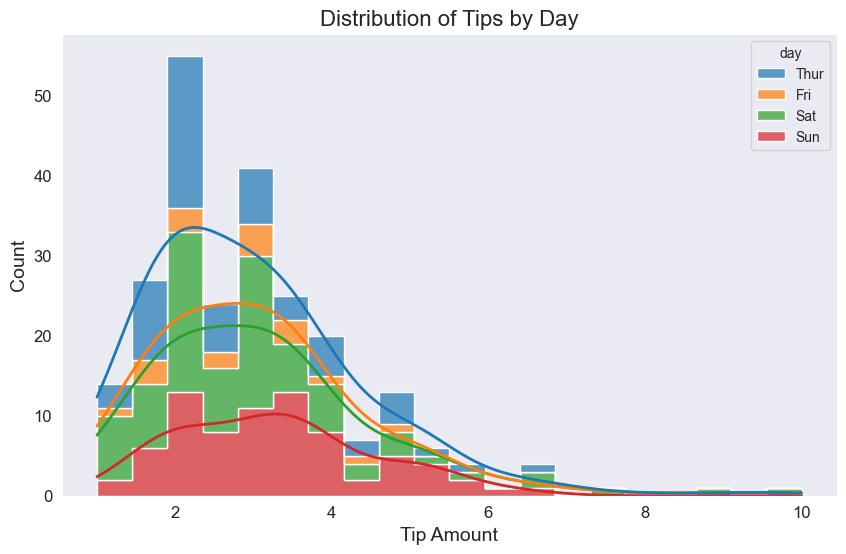

In [11]:
# 예제 1: 요일별 팁(tip) 분포 비교하기
#
# 문제 설명
# tips 데이터셋을 불러와서,
# 요일(day)별 팁(tip)의 분포를 시각화하고 비교해보자.
# Seaborn의 distplot 또는 histplot 함수를 사용한다.
#
# # 1. tips 데이터셋 불러오기
# tips = sns.load_dataset("tips")
# print(tips.head())

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.font_manager as fm

# 폰트 경로 설정
# font_path = "C:/Windows/Fonts/NanumGothic.ttf"
font_path= "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

sns.set_style("dark")

# 1. tips 데이터셋 불러오기
tips = sns.load_dataset("tips")
print(tips.head())

# 2. 요일별 팁 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(
    data=tips, x="tip", hue="day", kde=True, bins=20, element="step", multiple="stack",
    common_norm=False, alpha=0.7, line_kws={"linewidth": 2}
)

# 3. 그래프 제목 및 축 레이블 설정
plt.title("Distribution of Tips by Day", fontsize=16)
plt.xlabel("Tip Amount", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 4. 그래프 표시
plt.show()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']


C:\Users\dean1\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dean1\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


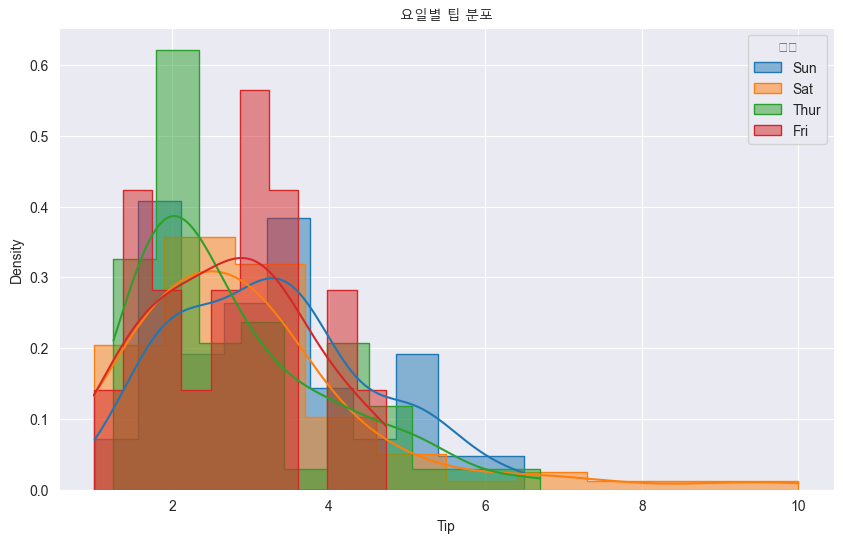

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 1. tips 데이터셋 불러오기
tips = sns.load_dataset("tips")
print(tips.head())

# 2. 그래프 스타일 설정
sns.set_style("darkgrid")

# 3. 요일별 히스토그램 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
days = tips["day"].unique()
print(days)

for day in days:
    # 현재 반복 중인 day와 일치하는 행들만 필터링하여 subset 데이터프레임에 저장합니다.
    subset = tips[tips["day"] == day]
    sns.histplot(subset["tip"], kde=True, label=day, element='step', stat='density', bins=10, alpha=0.5)

plt.title("요일별 팁 분포", fontproperties=font_prop)
plt.xlabel("Tip")
plt.ylabel("Density")
plt.legend(title="요일")
plt.show()


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


C:\Users\dean1\AppData\Local\Temp\ipykernel_14652\1996210999.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Day')
C:\Users\dean1\AppData\Local\Temp\ipykernel_14652\1996210999.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Day')


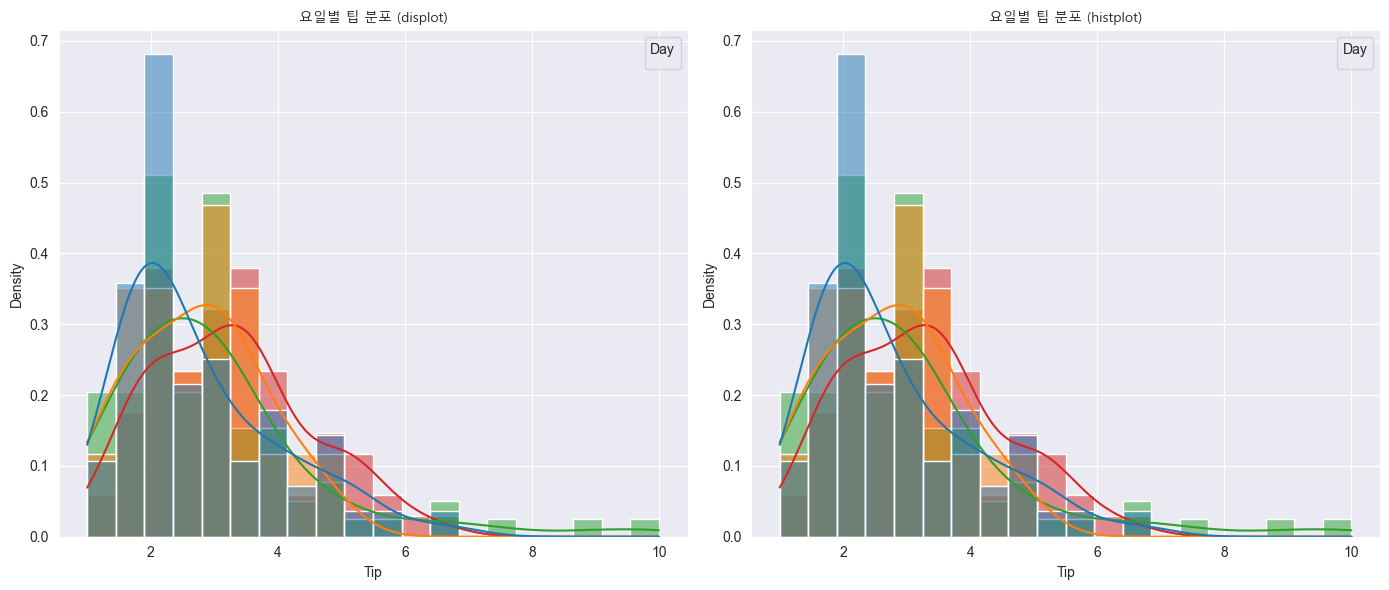

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 1. tips 데이터셋 불러오기
tips = sns.load_dataset("tips")
print(tips.head())

# 2. 그래프 스타일 설정
sns.set_style("darkgrid")

# 3. 요일별 팁 분포 시각화
plt.figure(figsize=(14, 6))

# a. displot 사용
plt.subplot(1, 2, 1)
sns.histplot(data=tips, x="tip", hue="day", kde=True, stat="density", common_norm=False, bins=20)
plt.title("요일별 팁 분포 (displot)", fontproperties=font_prop)
plt.xlabel("Tip")
plt.ylabel("Density")
plt.legend(title='Day')

# b. histplot 사용
plt.subplot(1, 2, 2)
sns.histplot(data=tips, x="tip", hue="day", kde=True, stat="density", common_norm=False, bins=20)
plt.title("요일별 팁 분포 (histplot)", fontproperties=font_prop)
plt.xlabel("Tip")
plt.ylabel("Density")
plt.legend(title='Day')

plt.tight_layout()
plt.show()

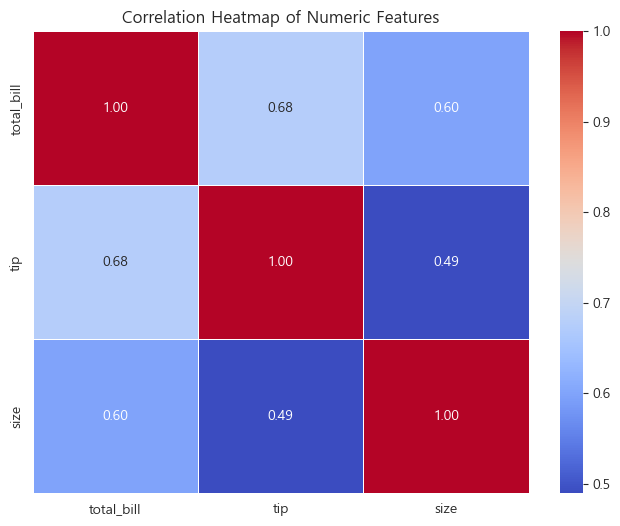

In [7]:
# 예제 2: 숫자형 변수 간 상관관계 히트맵 그리기
#
# 문제 설명
# tips 데이터셋에서 숫자형 열(예: total_bill, tip, size)을 골라
# 상관계수를 구하고 히트맵으로 시각화한다.
# Seaborn의 heatmap 함수를 사용한다.

# 1. tips 데이터셋 불러오기
tips = sns.load_dataset("tips")

# 2. 숫자형 변수 선택
numeric_tips = tips[['total_bill', 'tip', 'size']]

# 3. 결측치 제거 (필요한 경우)
numeric_tips = numeric_tips.dropna()

# 4. 상관계수 계산
corr_matrix = numeric_tips.corr()

# 5. 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# 6. 그래프 제목 설정
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


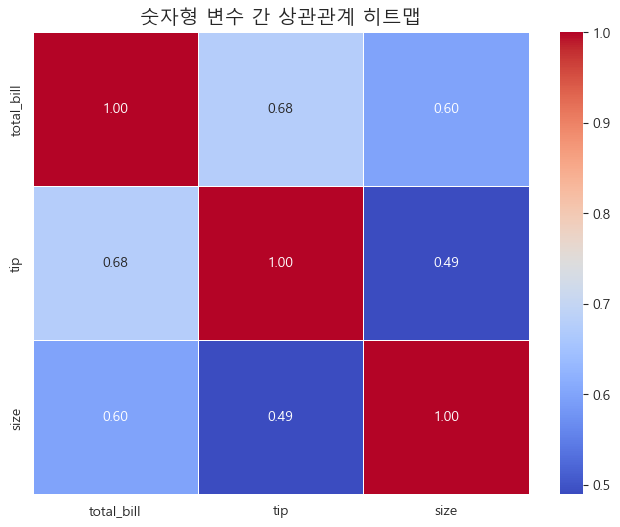

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

# 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 1. tips 데이터셋 불러오기
tips = sns.load_dataset("tips")
print(tips.head())

# 2. 숫자형 변수 선택하여 상관계수 계산
numeric_cols = tips.select_dtypes(include=['number'])  # 숫자형 데이터만 선택
corr_matrix = numeric_cols.corr()  # 상관계수 행렬 계산
print(corr_matrix)

# 3. 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)

# 그래프 설정
plt.title("숫자형 변수 간 상관관계 히트맵", fontproperties=font_prop, fontsize=14)
plt.show()

   total_bill   tip  size
0       16.99  1.01     2
1       10.34  1.66     3
2       21.01  3.50     3
3       23.68  3.31     2
4       24.59  3.61     4
상관계수 행렬:
             total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


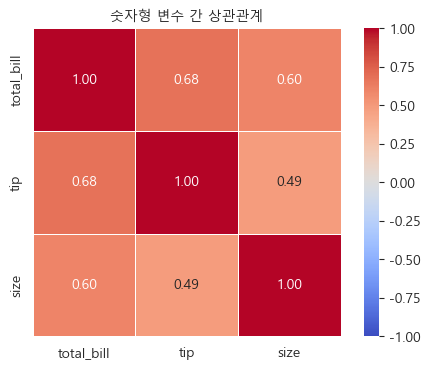

상관계수 해석:
tip과 total_bill의 상관계수: 0.68
tip과 tip의 상관계수: 1.00
tip과 size의 상관계수: 0.49


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 1. tips 데이터셋 불러오기
tips = sns.load_dataset("tips")

# 2. 숫자형 변수만 골라서 새로운 데이터프레임 생성
num_cols = ["total_bill", "tip", "size"]
heatmap_data = tips[num_cols].dropna()  # 결측치 제거
print(heatmap_data.head())

# 3. 상관계수 계산
corr_matrix = heatmap_data.corr()
print("상관계수 행렬:\n", corr_matrix)

# 4. 히트맵 시각화
plt.figure(figsize=(6, 4))  # 그래프 크기 설정
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title("숫자형 변수 간 상관관계", fontproperties=font_prop)
plt.show()

# 5. 상관계수 해석
print("상관계수 해석:")
for col in num_cols:
    print(f"tip과 {col}의 상관계수: {corr_matrix['tip'][col]:.2f}")

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           9.67e-34
Time:                        17:07:10   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

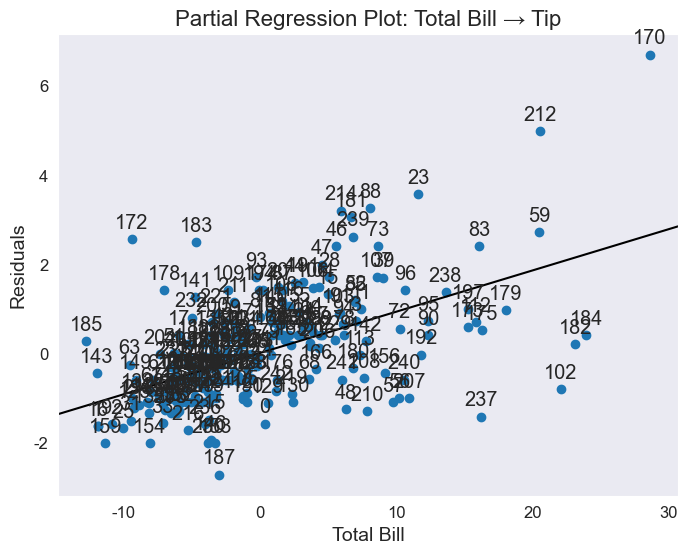

In [13]:
# 예제 3: 회귀 모델 적합 및 부분 회귀 플롯(Partial Regression Plot) 확인하기
# 문제 설명
# tips 데이터셋에서 종속 변수를 tip으로 하고,
# 독립 변수로 total_bill과 size를 사용하여 간단한 선형 회귀 모델을 적합한다.
# statsmodels의 OLS 회귀를 사용한 뒤,
# 부분 회귀 플롯으로 total_bill이 tip에 미치는 순수한 영향력을 시각화해본다.

# 1. 데이터 불러오기
tips = sns.load_dataset("tips")

# 2. 독립 변수(X)와 종속 변수(y) 설정
X = tips[["total_bill", "size"]]  # 독립 변수
y = tips["tip"]  # 종속 변수

# 3. 상수항 추가 (절편 포함)
X = sm.add_constant(X)

# 4. OLS 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 5. 회귀 분석 결과 출력
print(model.summary())

# 6. 부분 회귀 플롯 (total_bill의 순수한 영향력 확인)
fig, ax = plt.subplots(figsize=(8, 6))

# 기존 코드 그대로 사용
sm.graphics.plot_partregress("tip", "total_bill", ["size"], data=tips, ax=ax)

# 7. 그래프 제목 설정
plt.title("Partial Regression Plot: Total Bill → Tip", fontsize=16)
plt.xlabel("Total Bill", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 8. 그래프 표시
plt.show()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           9.67e-34
Time:                        19:54:08   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2       

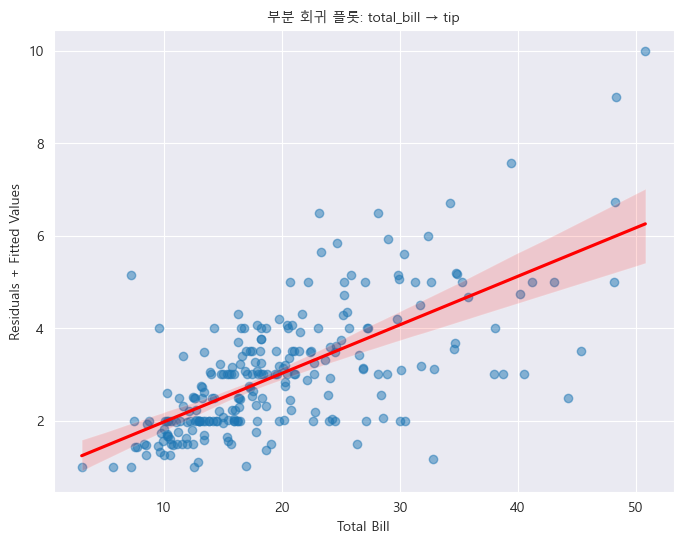

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import statsmodels.api as sm

# 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 1. tips 데이터셋 불러오기
tips = sns.load_dataset("tips")
print(tips.head())

# 2. 독립 변수(X)와 종속 변수(y) 정의
X = tips[["total_bill", "size"]]  # 독립 변수
y = tips["tip"]  # 종속 변수

# 3. 상수항 추가 (절편 포함)
X = sm.add_constant(X)

# 4. OLS 회귀 분석 모델 적합
model = sm.OLS(y, X).fit()
print(model.summary())  # 회귀 분석 결과 출력

# 5. 부분 회귀 플롯 (Partial Regression Plot)
fig, ax = plt.subplots(figsize=(8, 6))

# total_bill이 tip에 미치는 영향 시각화
sns.regplot(x=tips["total_bill"], y=model.resid + model.fittedvalues, ax=ax, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# 그래프 설정
ax.set_title("부분 회귀 플롯: total_bill → tip", fontproperties=font_prop)
ax.set_xlabel("Total Bill", fontproperties=font_prop)
ax.set_ylabel("Residuals + Fitted Values", fontproperties=font_prop)

plt.show()


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           9.67e-34
Time:                        20:08:06   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

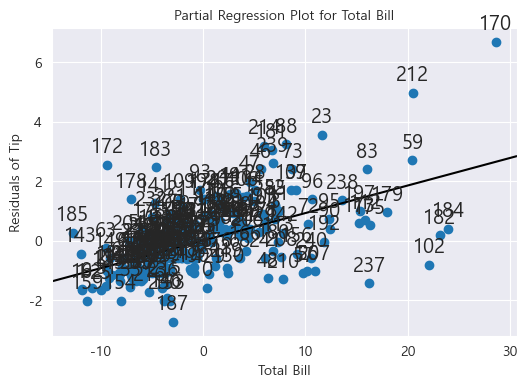

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_partregress
import matplotlib.font_manager as fm

# 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 1. tips 데이터셋 불러오기
tips = sns.load_dataset("tips")

# 2. 독립 변수와 종속 변수 분리
X = tips[["total_bill", "size"]]
y = tips["tip"]

# 3. 상수항 추가
X = sm.add_constant(X)

# 4. OLS 회귀 모델 적합
model = sm.OLS(y, X).fit()
print(model.summary())  # 모델 요약 결과 출력

# 5. 부분 회귀 플롯(Partial Regression Plot)
fig, ax = plt.subplots(figsize=(6, 4))
plot_partregress("tip", "total_bill", ["size"], data=tips, ax=ax)
plt.title("Partial Regression Plot for Total Bill", fontproperties=font_prop)
plt.xlabel("Total Bill")
plt.ylabel("Residuals of Tip")
plt.show()